In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

In [66]:
warnings.simplefilter(action='ignore',category='FutureWarning')
pd.options.mode.chained_assignment=None

Pregunta 1:


In [47]:
#Impoortar y guardar en una variable los datos
#Con tail vemos los últimos 2 registros
officers = pd.read_pickle("officers.pkl")
officers.tail(2)

,case_number,race,gender,last_name,first_name,full_name
368,165193-2016,W,M,Cannon,Elmar,"Cannon, Elmar"
369,165193-2016,B,M,Stuart,Kristopher,"Stuart, Kristopher"


In [48]:
#Generamos un DataFrame con Pandas
df_officers = pd.DataFrame(officers)
df_officers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   case_number  370 non-null    object
 1   race         366 non-null    object
 2   gender       370 non-null    object
 3   last_name    370 non-null    object
 4   first_name   367 non-null    object
 5   full_name    370 non-null    object
dtypes: object(6)
memory usage: 17.5+ KB


In [49]:
subjects = pd.read_pickle("subjects.pkl")
df_subjects = pd.DataFrame(subjects)
df_subjects.head(2)

,case_number,race,gender,last_name,first_name,full_name
0,44523A,L,M,Curry,James,"Curry, James"
1,121982X,L,M,Chavez,Gabriel,"Chavez, Gabriel"


In [50]:
incidents = pd.read_pickle("incidents.pkl")
df_incidents = pd.DataFrame(incidents)
df_incidents.head(2)

,case_number,date,location,subject_statuses,subject_weapon,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
0,44523A,2013-02-23,3000 Chihuahua Street,Injured,Handgun,"Curry, James L/M",1,"Patino, Michael L/M; Fillingim, Brian W/M",2,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, February 23, 2013, at approximate...",NaN,NaN
1,121982X,2010-05-03,1300 N. Munger Boulevard,Injured,Handgun,"Chavez, Gabriel L/M",1,"Padilla, Gilbert L/M",1,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Monday, May 3, 2010, at approximately 8:06 ...",NaN,NaN


Crear una tabla con la unión de cada una de las tablas; utilizando sufijos para las columnas con mismos nombres

In [51]:
df_merged1 = pd.merge(df_officers, df_subjects, on='case_number', how='outer', suffixes=('_of', '_sub')).merge(df_incidents, on='case_number', how='outer')
df_merged1.head(2)

,case_number,race_of,gender_of,last_name_of,first_name_of,full_name_of,race_sub,gender_sub,last_name_sub,first_name_sub,...,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
0,44523A,L,M,Patino,Michael,"Patino, Michael",L,M,Curry,James,...,"Curry, James L/M",1,"Patino, Michael L/M; Fillingim, Brian W/M",2,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, February 23, 2013, at approximate...",NaN,NaN
1,44523A,W,M,Fillingim,Brian,"Fillingim, Brian",L,M,Curry,James,...,"Curry, James L/M",1,"Patino, Michael L/M; Fillingim, Brian W/M",2,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, February 23, 2013, at approximate...",NaN,NaN


In [52]:
#Revisar duplicados
df_merged1[df_merged1.duplicated(subset='case_number')]

,case_number,race_of,gender_of,last_name_of,first_name_of,full_name_of,race_sub,gender_sub,last_name_sub,first_name_sub,...,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
1,44523A,W,M,Fillingim,Brian,"Fillingim, Brian",L,M,Curry,James,...,"Curry, James L/M",1,"Patino, Michael L/M; Fillingim, Brian W/M",2,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, February 23, 2013, at approximate...",NaN,NaN
5,384832T,B,M,Mondy,Michael,"Mondy, Michael",B,M,Dews,Antonio,...,"Smith, James B/M; Dews, Antonio B/M; Spearman,...",3,"Mondy, Michael B/M",1,None,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, May 26, 2007, at approximately 1:...",NaN,NaN
6,384832T,B,M,Mondy,Michael,"Mondy, Michael",B,M,Spearman,Damion,...,"Smith, James B/M; Dews, Antonio B/M; Spearman,...",3,"Mondy, Michael B/M",1,None,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, May 26, 2007, at approximately 1:...",NaN,NaN
9,363184P,B,M,Culp,Barrick,"Culp, Barrick",L,M,Garcia,David,...,"Garcia, David L/M",1,"Woods, Jesse W/M; Culp, Barrick B/M",2,None,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Monday, May 9, 2005, at approximately 11:50...",NaN,NaN
11,559487M,L,M,Armendariz,Michael,"Armendariz, Michael",B,M,Vernon,Tony,...,"Vernon, Tony B/M",1,"Rangel, Mark L/M; Armendariz, Michael L/M",2,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Thursday, July 24, 2003, at approximately 1...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,165193-2016,W,M,Michaels,Mark,"Michaels, Mark",B,M,Johnson,Micah,...,"Johnson, Micah B/M",1,"Edwards, Henry W/M; Wells, Giovanni B/M; Junge...",12,None,None,None,None,32.77945,-96.804915
376,165193-2016,W,M,Borchardt,Jeremy,"Borchardt, Jeremy",B,M,Johnson,Micah,...,"Johnson, Micah B/M",1,"Edwards, Henry W/M; Wells, Giovanni B/M; Junge...",12,None,None,None,None,32.77945,-96.804915
377,165193-2016,W,M,Craig,Robert,"Craig, Robert",B,M,Johnson,Micah,...,"Johnson, Micah B/M",1,"Edwards, Henry W/M; Wells, Giovanni B/M; Junge...",12,None,None,None,None,32.77945,-96.804915
378,165193-2016,W,M,Cannon,Elmar,"Cannon, Elmar",B,M,Johnson,Micah,...,"Johnson, Micah B/M",1,"Edwards, Henry W/M; Wells, Giovanni B/M; Junge...",12,None,None,None,None,32.77945,-96.804915


In [53]:
#Eliminar duplicados con el metodo drop_duplicates()
df_nmerged = df_merged1.drop_duplicates(subset='case_number')
df_nmerged.head(2)

,case_number,race_of,gender_of,last_name_of,first_name_of,full_name_of,race_sub,gender_sub,last_name_sub,first_name_sub,...,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
0,44523A,L,M,Patino,Michael,"Patino, Michael",L,M,Curry,James,...,"Curry, James L/M",1,"Patino, Michael L/M; Fillingim, Brian W/M",2,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, February 23, 2013, at approximate...",NaN,NaN
2,121982X,L,M,Padilla,Gilbert,"Padilla, Gilbert",L,M,Chavez,Gabriel,...,"Chavez, Gabriel L/M",1,"Padilla, Gilbert L/M",1,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Monday, May 3, 2010, at approximately 8:06 ...",NaN,NaN


¿Cuántos sujetos de género F hay en el DataFrame resultante? hint: usa el método
.value_counts() sobre la columna.


In [54]:
#Utilizar un for para recorrer las columnas dadas en el DataFrame y devolver la cantidad
count_of_genres = ['gender_of', 'gender_sub']
for column in count_of_genres:
        print(df_nmerged[column].value_counts())

gender_of
M    211
F      8
Name: count, dtype: int64
gender_sub
M    210
F      6
Name: count, dtype: int64


In [55]:
#Haciendo lo mismo pero vectorizado
df_nmerged[count_of_genres].apply(pd.Series.value_counts)


,gender_of,gender_sub
M,211,210
F,8,6


In [56]:
#Filtramos por el genero del sospechoso y número de caso para luego utilizar la funcion nunique()
df_femalesub = df_nmerged.filter(items=['case_number', 'gender_sub'])
print(df_femalesub["gender_sub"].nunique())

2


In [57]:
df_nmerged['gender_sub'].value_counts()

gender_sub
M    210
F      6
Name: count, dtype: int64

Genera una tabla pivote que muestre el número de casos por mes en la fila y por año en
las columnas. hint: genere columnas de tipo fecha con pd.to_datetime(). ¿Se ve alguna
relación entre mes del año y cantidad de casos?


R Para poder crear esta pivot table es necesario cambiar la columna date a tipo datetime que es lo primero que hacemos.
Luego la fecha la separamos en Año, Mes, Día para poder crear la tabla pivote con las filas mes y las columnas año


 ¿Se ve alguna relación entre mes del año y cantidad de casos?
La cantidad de casos por mes aumenta de octubre a diciembre

In [58]:
df_nmerged['date'] = pd.to_datetime(df_nmerged['date'])
df_nmerged['date']

0     2013-02-23
2     2010-05-03
3     2007-08-12
4     2007-05-26
7     2006-04-03
         ...    
364   2016-07-03
365   2016-06-11
366   2016-04-16
367   2016-07-23
368   2016-07-07
Name: date, Length: 219, dtype: datetime64[ns]

In [59]:
df_nmerged['day'] = df_nmerged['date'].dt.day
df_nmerged['month'] = df_nmerged['date'].dt.month
df_nmerged['year'] = df_nmerged['date'].dt.year

In [60]:
df_pivot1 = pd.pivot_table(df_nmerged, values=["case_number"], index=["month"], columns=["year"], aggfunc={'case_number':'count'})
df_pivot1.fillna(0)

case_number                                                              \
year         2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015   
month                                                                           
1             2.0  1.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  2.0  1.0  0.0   
2             0.0  1.0  1.0  3.0  1.0  0.0  0.0  2.0  0.0  4.0  2.0  2.0  1.0   
3             1.0  4.0  1.0  1.0  2.0  1.0  2.0  4.0  1.0  2.0  3.0  0.0  0.0   
4             1.0  1.0  0.0  2.0  0.0  1.0  0.0  1.0  0.0  0.0  2.0  2.0  0.0   
5             1.0  1.0  1.0  2.0  4.0  2.0  3.0  1.0  1.0  6.0  1.0  1.0  0.0   
6             2.0  1.0  0.0  0.0  2.0  3.0  0.0  2.0  1.0  2.0  2.0  3.0  4.0   
7             3.0  2.0  0.0  0.0  1.0  2.0  0.0  1.0  1.0  2.0  2.0  1.0  1.0   
8             2.0  0.0  1.0  0.0  3.0  2.0  0.0  0.0  0.0  2.0  0.0  6.0  1.0   
9             0.0  1.0  0.0  2.0  2.0  2.0  3.0  0.0  0.0  0.0  3.0  1.0  2.0   
10            5.0  1.0  0.0  0.0  0.0  0.0  2.0  1.0  1.0  2.0  3.0  2.0  0.0   
11            2.0  0.0  2.0  4.0  0.0  0.0  1.0  3.0  3.0  1.0  1.0  0.0  2.0   
12            0.0  2.0  4.0  0.0  0.0  2.0  3.0  2.0  4.0  2.0  1.0  1.0  0.0   

            
year  2016  
month       
1      0.0  
2      0.0  
3      1.0  
4      1.0  
5      0.0  
6      2.0  
7      3.0  
8      1.0  
9      0.0  
10     0.0  
11     0.0  
12     0.0

In [61]:
df_pivot1.mean('columns') #revisar la media de caso por mes

month
1     1.250000
2     1.888889
3     1.916667
4     1.375000
5     2.000000
6     2.181818
7     1.727273
8     2.250000
9     2.000000
10    2.125000
11    2.111111
12    2.333333
dtype: float64

<Axes: xlabel='None-year', ylabel='month'>

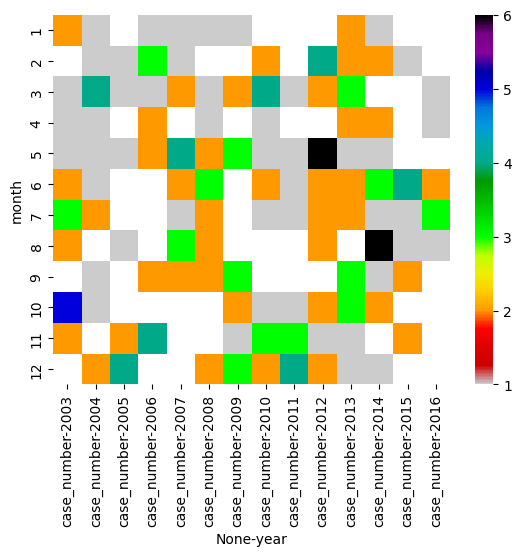

In [83]:
sns.heatmap(df_pivot1, annot=False, cmap='nipy_spectral_r')

Genera una tabla pivote que muestre en las filas el género del oficial y en las columnas el
género del subject. ¿Cómo interpretas los valores que muestra esta vista?

Según las etiquetas la mayor cantidad de involucrados, tanto oficiales como sospechosos son hombres

In [67]:
df_pivot2 = df_nmerged.pivot_table(index='gender_of', columns='gender_sub', aggfunc="count")
df_pivot2.fillna(0)

attorney_general_forms_url      case_number        date         \
gender_sub                          F    M           F      M    F      M   
gender_of                                                                   
F                                 0.0  0.0         0.0    8.0  0.0    8.0   
M                                 0.0  2.0         6.0  202.0  6.0  202.0   

            day        first_name_of         ... subject_weapon         \
gender_sub    F      M             F      M  ...              F      M   
gender_of                                    ...                         
F           0.0    8.0           0.0    7.0  ...            0.0    8.0   
M           6.0  202.0           6.0  201.0  ...            6.0  202.0   

           subjects        summary_text        summary_url        year         
gender_sub        F      M            F      M           F      M    F      M  
gender_of                                                                      
F               0.0    8.0          0.0    8.0         0.0    8.0  0.0    8.0  
M               6.0  202.0          6.0  199.0         6.0  199.0  6.0  202.0  

[2 rows x 52 columns]

In [68]:
pd.pivot_table(data=df_nmerged, index='gender_of', columns='gender_sub', values='case_number', aggfunc='count').fillna(0)

gender_sub,F,M
gender_of,,
F,0.0,8.0
M,6.0,202.0


Pregunta 2:

In [69]:
#Cargar datos en un DataFrame
cleaned = pd.read_csv("Cleaned_DS_Jobs.csv")
df_cleaned1 = pd.DataFrame(cleaned)
df_cleaned1.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,...,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,...,27,0,0,0,0,1,0,0,data scientist,senior
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Company - Public,Research & Development,...,52,0,0,1,0,0,0,1,data scientist,na


In [70]:
#Reemplezar valores nulos por NaN
df_cleaned2 = df_cleaned1.replace(["na", "NA", -1, "0", "-1", "null", "n/a", "N/A", "NULL"], value= np.nan)
df_cleaned2

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,...,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,...,27.0,0,0,0,0,1,0,0,data scientist,senior
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Company - Public,Research & Development,...,52.0,0,0,1,0,0,0,1,data scientist,NaN
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting,...,39.0,1,1,0,0,1,0,0,data scientist,NaN
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,Company - Public,Electrical & Electronic Manufacturing,...,20.0,1,1,0,0,1,0,0,data scientist,NaN
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,...,22.0,1,1,0,0,0,0,0,data scientist,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Data Scientist,105-167,Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,Company - Private,Advertising & Marketing,...,31.0,1,1,1,0,0,1,1,data scientist,NaN
656,Data Scientist,105-167,Job Description\nBecome a thought leader withi...,0.0,JKGT,"San Francisco, CA",NaN,NaN,NaN,NaN,...,NaN,0,0,0,0,0,0,0,data scientist,NaN
657,Data Scientist,105-167,Join a thriving company that is changing the w...,0.0,AccessHope,"Irwindale, CA",NaN,NaN,NaN,NaN,...,NaN,1,1,1,0,0,1,0,data scientist,NaN
658,Data Scientist,105-167,100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,Company - Private,Advertising & Marketing,...,NaN,1,0,1,1,0,0,1,data scientist,NaN


In [71]:
#Eliminar todas las filas con datos faltantes
#Renombramos el DF resultante como "wonan" por WithOut NaN
df_wonan = df_cleaned2.dropna(axis=0)
df_wonan

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,...,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,...,27.0,0,0,0,0,1,0,0,data scientist,senior
32,Senior Research Statistician- Data Scientist,75-131,Acuity is seeking a Senior Research Statistici...,4.8,Acuity Insurance,"Sheboygan, WI","Sheboygan, WI",1001 to 5000 employees,Company - Private,Insurance Carriers,...,95.0,0,0,0,0,0,0,0,data scientist,senior
38,Senior Analyst/Data Scientist,75-131,At Edmunds were driven to make car buying easi...,3.4,Edmunds.com,"Santa Monica, CA","Santa Monica, CA",501 to 1000 employees,Company - Private,Internet,...,54.0,1,1,0,0,1,1,0,data scientist,senior
45,Senior Data Scientist,75-131,Klaviyo is looking for Senior Data Scientists ...,4.8,Klaviyo,"Boston, MA","Boston, MA",201 to 500 employees,Company - Private,Computer Hardware & Software,...,8.0,0,0,0,0,0,0,0,data scientist,senior
54,Senior Data Scientist,75-131,Benson Hill empowers innovators to develop mor...,3.5,Benson Hill,"Saint Louis, MO","Saint Louis, MO",201 to 500 employees,Company - Private,Biotech & Pharmaceuticals,...,8.0,1,1,0,0,0,0,1,data scientist,senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,Senior Data Engineer,138-158,Senior Data Engineer\n\nMaster’s degree in Inf...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,...,22.0,1,0,1,1,0,1,0,data engineer,senior
583,Senior Data Scientist,80-132,Job Requisition ID #\n20WD40666\nJob Title\nSe...,4.0,Autodesk,"San Francisco, CA","San Rafael, CA",5001 to 10000 employees,Company - Public,Computer Hardware & Software,...,38.0,1,0,1,1,0,0,1,data scientist,senior
601,Senior Data Scientist,87-141,"Secure our Nation, Ignite your Future\n\nJob S...",4.2,ManTech,"Alexandria, VA","Herndon, VA",5001 to 10000 employees,Company - Public,Research & Development,...,52.0,1,0,1,1,0,1,1,data scientist,senior
640,Senior Data Scientist,105-167,"About Us\n\nAt GutCheck, we pioneered agile ma...",3.8,GutCheck,"Denver, CO","Denver, CO",51 to 200 employees,Company - Private,Advertising & Marketing,...,11.0,0,0,0,0,0,0,0,data scientist,senior


Generar dos columnas a partir de Salary Estimated, para esto primero cambiamos el nombre de esta columna a "Salary_estimate"
Luego indicando el nombre de cada columna "est_min" para el minimo y "est_max" para el maximo, utilizamos la función apply con lambda y dento de esta pd Series donde busca por el string "-" para separar los valores.
Una vez realizado esto y para poder trabajar con estos datos númericos, que actualmente se encuentran como object; los convertimos a numeric.

In [72]:
df_wonan.columns= df_wonan.columns.str.replace("Salary Estimate", "Salary_estimate")
df_wonan.head(3)

,Job Title,Salary_estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,...,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,...,27.0,0,0,0,0,1,0,0,data scientist,senior
32,Senior Research Statistician- Data Scientist,75-131,Acuity is seeking a Senior Research Statistici...,4.8,Acuity Insurance,"Sheboygan, WI","Sheboygan, WI",1001 to 5000 employees,Company - Private,Insurance Carriers,...,95.0,0,0,0,0,0,0,0,data scientist,senior
38,Senior Analyst/Data Scientist,75-131,At Edmunds were driven to make car buying easi...,3.4,Edmunds.com,"Santa Monica, CA","Santa Monica, CA",501 to 1000 employees,Company - Private,Internet,...,54.0,1,1,0,0,1,1,0,data scientist,senior


In [73]:
df_wonan[["est_min", "est_max"]]= df_wonan["Salary_estimate"].apply(lambda x: pd.Series(str(x).split("-")))
df_wonan.head(3)

,Job Title,Salary_estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,...,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority,est_min,est_max
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,...,0,0,0,1,0,0,data scientist,senior,137,171
32,Senior Research Statistician- Data Scientist,75-131,Acuity is seeking a Senior Research Statistici...,4.8,Acuity Insurance,"Sheboygan, WI","Sheboygan, WI",1001 to 5000 employees,Company - Private,Insurance Carriers,...,0,0,0,0,0,0,data scientist,senior,75,131
38,Senior Analyst/Data Scientist,75-131,At Edmunds were driven to make car buying easi...,3.4,Edmunds.com,"Santa Monica, CA","Santa Monica, CA",501 to 1000 employees,Company - Private,Internet,...,1,0,0,1,1,0,data scientist,senior,75,131


In [74]:
#Convertir a numeric
df_wonan["est_min"] = pd.to_numeric(df_wonan["est_min"])

In [75]:
df_wonan["est_max"]= pd.to_numeric(df_wonan["est_max"])

Recodificacion de la columna Size utilizando el metodo replace, en este caso en forma de dictionary

In [76]:
df_wonan['Size']=df_wonan['Size'].replace({'501 to 1000 employees':'Microempresas',
                          '51 to 200 employees': 'Pequeñas Grandes Empresas',
                          '201 to 500 employees': 'Pequeñas Empresas',
                          '1001 to 5000 employees': 'Medianas Empresas',
                          '5001 to 10000 employees': 'Grandes Empresas',
                          '10000+ employees': 'Mega Empresas',
                          'Unknown': 'Empresas sin informacion'})

df_wonan.head(3)

,Job Title,Salary_estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,...,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority,est_min,est_max
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",Medianas Empresas,Nonprofit Organization,Insurance Carriers,...,0,0,0,1,0,0,data scientist,senior,137,171
32,Senior Research Statistician- Data Scientist,75-131,Acuity is seeking a Senior Research Statistici...,4.8,Acuity Insurance,"Sheboygan, WI","Sheboygan, WI",Medianas Empresas,Company - Private,Insurance Carriers,...,0,0,0,0,0,0,data scientist,senior,75,131
38,Senior Analyst/Data Scientist,75-131,At Edmunds were driven to make car buying easi...,3.4,Edmunds.com,"Santa Monica, CA","Santa Monica, CA",Microempresas,Company - Private,Internet,...,1,0,0,1,1,0,data scientist,senior,75,131


Pivot Table con la media de estimado minimo y estimado maximo por tamaño de empresa.
Donde en el index entregamos el size en los valores ambas columnas y la funcion agregatoria es mean y el resultado lo ordenamos por la columna est_max de forma descendente

In [77]:
df_pivot3 = pd.pivot_table(
                           data=df_wonan
                          ,index="Size"
                          ,values=["est_min", "est_max"]
                          ,aggfunc="mean"
                          ,margins=True
)
df_pivot3.sort_values(by=['est_max'], ascending=False)

,est_max,est_min
Size,,
Mega Empresas,151.111111,97.888889
Microempresas,146.235294,100.176471
Pequeñas Empresas,141.142857,93.571429
All,141.137500,95.512500
Grandes Empresas,138.875000,92.125000
Pequeñas Grandes Empresas,137.666667,100.666667
Medianas Empresas,137.461538,93.923077
Empresas sin informacion,110.500000,73.000000
